# Week 11 work

In [1]:
# From ChatGPT
import numpy as np

class Particle:
    def __init__(self, position, velocity, density, mass):
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.density = density
        self.mass = mass
        self.acceleration = np.zeros_like(self.position)
    
    def __repr__(self):
        return f"Particle(position={self.position}, velocity={self.velocity}, acceleration={self.acceleration}, density={self.density}, mass={self.mass})"

class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
        self.G = 6.674e-11
    
    def update_accelerations(self):
        num_particles = len(self.particles)
        for i in range(num_particles):
            a = np.zeros_like(self.particles[i].position)
            for j in range(num_particles):
                if i == j:
                    continue
                r = self.particles[j].position - self.particles[i].position
                dist = np.linalg.norm(r)
                f = self.G * self.particles[i].mass * self.particles[j].mass / dist**2
                a += f / self.particles[i].mass * r / dist
            self.particles[i].acceleration = a
    
    def update_particles(self, dt=0.01):
        for particle in self.particles:
            particle.velocity += particle.acceleration * dt
            particle.position += particle.velocity * dt
    
    def simulate(self, num_steps, dt=0.01):
        for i in range(num_steps):
            self.update_accelerations()
            self.update_particles(dt)


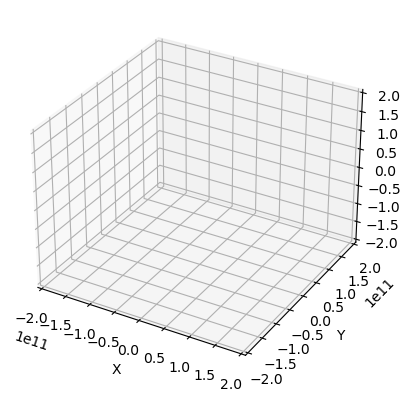

In [4]:
import matplotlib.pyplot as plt

# Define the particles
particles = [
    Particle(np.array([0, 0, 0]), np.array([0, 0, 0]), 1, 5.97e24),  # Earth
    Particle(np.array([1.5e11, 0, 0]), np.array([0, 30000, 0]), 0.001, 1.99e30),  # Sun
    Particle(np.array([1.5e11, 3.84e8, 0]), np.array([-10000, 30000, 0]), 0.001, 7.34e22),  # Moon
]

# Simulate the particles
simulator = ParticleSimulator(particles)
simulator.simulate(num_steps=10000)

# Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for particle in particles:
    ax.plot(particle.position.T[0], particle.position.T[1], particle.position.T[2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim([-2e11, 2e11])
ax.set_ylim([-2e11, 2e11])
ax.set_zlim([-2e11, 2e11])
plt.show()


# Week 10 weekend work
This is based off the "N Body" Jupyter Notebook written by Yihan, and I've rewritten it OOP style. Still needs a lot of cleaning and optimization, but this is a more polished version of how it will work.

In [ ]:
#################################
# rewriting Yihan's work as OOP #
#################################

import numpy as np 
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class yihanParticle():
    """
    A duplicated particle class for testing with the
    N-body code. Particles are assumed to have constant
    mass, and only have a position and velocity.
    ...
    Attributes
    ----------
    p : list
        List with three elements, representing the
        particle's position in 3D space.
        
    d : list
        List with three elements, representing the
        particle's direction vector in 3D space.

    Methods
    -------
    getPos()
        Returns position of the particle.
        
    getDir()
        Returns direction vector of the particle.

    getMagnitude()
        Returns magnitude of the direction vector.
        
    setPos(newPos)
        Updates position of the particle.
        
    setDir(newDir)
        Updates direction vector of the particle.
    """

    def __init__(self, position, direction):
        self._p = position
        self._d = direction
    
    def __str__(self):
        return f"Current position: {self._p}. Current direction: {self._d}."
    
    def getPos(self):
        return self._p
    
    def getDir(self):
        return self._d

    def getMagnitude(self):
        return np.linalg.norm(self._p)
    
    def setPos(self, newPos):
        self._p = newPos
        
    def setDir(self, newDir):
        self._d = newDir

class yPS():
    """
    A duplicated particle simulator class for testing
    with the N-body code. Particles are assumed to have
    constant mass, and only have a position and velocity.
    The class name yPS is short for yihanParticleSimulator.
    ...
    Attributes
    ----------
    n : int
        Number of particles in the simulation.
        
    g : int
        Seed for the pseurandom number generator that
        produces the starting points of the particles.
        
    lbound : int
        Lower bound for the starting coordinates of the
        particles.
     
    ubound : int
        Upper bound for the starting coordinates of the
        particles.
    
    particles : list
        List of yihanParticle class objects.

    Methods
    -------
    getPos()
        Returns position of the particle.
        
    getDir()
        Returns direction vector of the particle.

    getMagnitude()
        Returns magnitude of the direction vector.
        
    setPos(newPos)
        Updates position of the particle.
        
    setDir(newDir)
        Updates direction vector of the particle.
        
    -----
        
    printAllPos()
        Iterates through the list of yihanParticle
        objects, and prints each one.
    
    printThisPos(n)
        Prints the nth yihanParticle object in
        particles.
        
    getParticles()
        Returns a list containing the positions of all
        the yihanParticle objects in particles.
    
    accGen()
        Creates an n by n matrix containing the acceleration
        vectors of all yihanParticle objects in particles.
        This function runs in O(n^2), as it performs a
        naive pairwise comparison.
    
    updateAll()
        Updates the positions and direction vectors of all
        yihanParticle objects in particles. Has a hardcoded
        timestep of 0.01 seconds.
            
    pwAcc(p1, p2)
        Returns the acceleration on particle p1 exerted
        by particle p2.
        
    pToP(p1, p2)
        Returns the direction vector from particle p1
        to particle p2.
    
    getDist(p1, p2)
        Returns the distance between the two particles
        p1 and p2.
    """
    
    def __init__(self, n, dims, seed):
        self.n = n
        self.g = random.seed(seed)
        self.lbound = dims[0]
        self.ubound = dims[1]
        particlePositions = []
        for i in range(n):
            particlePositions.append(
                [random.randrange(self.lbound, self.ubound),
                 random.randrange(self.lbound, self.ubound),
                 random.randrange(self.lbound, self.ubound)])
        # initial direction vector of 0
        self.particles = [yihanParticle(particlePositions[i], [0, 0, 0]) for i in range(n)]
        
    def __str__(self):
        return f"System of {self.n} particles. Bounded by [{self.lbound}, {self.ubound}]."
    
    def printAllPos(self):
        for i in self.particles:
            print(i)
    
    def printThisPos(self, n):
        print(self.particles[n])
        
    def getParticles(self):
        ans = []
        for i in self.particles:
            ans.append(i.getPos())
        return ans
    
    # generates list of accelerations
    # O(n^2) at present - to optimize.
    def accGen(self):
        allAcc = [[] for i in range(self.n)]
        finalAcc = [0 for i in range(self.n)]
        for i in range(self.n):
            temp = []
            for j in range(self.n):
                temp.append(self.pwAcc(self.particles[i], self.particles[j]))
            allAcc[i] = temp
        for i in range(self.n):
            #finalAcc.append(allAcc[i])
            xSum = sum(j[0] for j in allAcc[i])
            ySum = sum(j[1] for j in allAcc[i])
            zSum = sum(j[2] for j in allAcc[i])
            finalAcc[i] = [xSum, ySum, zSum]
        return finalAcc
    
    # updates velocities and positions of the particles
    # hardcoded timestep of 0.01s
    def updateAll(self):
        accs = self.accGen()
        for i in range(self.n):
            tPar = self.particles[i]
            timedAcc = [accs[i][j] * 0.01 for j in range(3)]
            timedVel = [tPar.getDir()[k] * 0.01 for k in range(3)]
            tempAcc = [accs[i][l] * (0.5 * (0.01 ** 2)) for l in range(3)]
            newPos = [tPar.getPos()[a] + timedVel[a] + tempAcc[a] for a in range(3)]
            newVel = [tPar.getDir()[a] + timedAcc[a] for a in range(3)]
            self.particles[i].setPos(newPos)
            self.particles[i].setDir(newVel)
            
    # pairwise acceleration of p1 towards p2
    def pwAcc(self, p1, p2):
        if p1 == p2:
            return [0.0, 0.0, 0.0]
        else:
            dist = self.getDist(p1, p2)
            vec = self.pToP(p1, p2)
            for i in range(3):
                vec[i] = vec[i] / (dist ** 3)
            return vec
        
    # direction vector from p1 to p2
    def pToP(self, p1, p2):
        if p1 == p2:
            return [0, 0, 0]
        else:
            vec = [0, 0, 0]
            for i in range(3):
                vec[i] = p2.getPos()[i] - p1.getPos()[i]
            return vec
    
    # distance between two particles
    def getDist(self, p1, p2):
        if p1 == p2:
            return 0.0
        else:
            vec = [0, 0, 0]
            for i in range(3):
                vec[i] = p1.getPos()[i] - p2.getPos()[i]
            return np.linalg.norm(vec)
        
    # a basic (and wrong) kernel
    # if distance more than 1, effect is 0
    # if distance less than 1, effect is 1-distance^2
    # not needed with pairwise acceleration present
    # not currently used
    #def effect(self, p1, p2):
    #    if p1 == p2:
    #        return 0.0
    #    elif yPS.getDist(p1, p2) > 1:
    #        return 0.0
    #    else:
    #        scale = yPS.getDist(p1, p2)
    #        return 1 - (scale ** 2)

In [ ]:
"""
checkPS = yPS(2, [0, 5], 2)
checkPosData = []

for i in range(100):
    checkPosData.append(checkPS.getParticles())
    checkPS.updateAll()
    
checkCount = len(checkPosData[0])
cleanCheckPos = [[] for i in range(checkCount)]
print(checkCount)
for i in range(checkCount):
    for j in checkPosData:
        cleanCheckPos[i].append(j[i])

print(cleanCheckPos)
"""

In [ ]:
"""
With some help from ChatGPT, this is the code
to plot the movement of the particles.
"""
plotParticleSim = yPS(8, [0, 5], 7)
rawPosData = []

for i in range(6000):
    rawPosData.append(plotParticleSim.getParticles())
    plotParticleSim.updateAll()
    
plotCount = len(rawPosData[0])
cleanPosData = [[] for i in range(plotCount)]
print(plotCount)
for i in range(plotCount):
    for j in rawPosData:
        cleanPosData[i].append(j[i])

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectories
for i in cleanPosData:
    xCoord = [j[0] for j in i]
    yCoord = [j[1] for j in i]
    zCoord = [j[2] for j in i]
    ax.plot(xCoord, yCoord, zCoord)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

# Week 10 work

In [ ]:
import numpy as np
import random

class randomPArray():
    """
    Particle array has the following attributes:
    1. An array of n particles
    2. Lots of functions to work on the particles
    """
    
    def __init__(self, n, dims, seed):
        """ Initializes a new random particle array.
        
        Parameters
        ----------
        n : int
            Number of particles in our particle array.
        dims : list
            A list with two elements - the range in which
            the particles can exist (think of this as the
            bounds of the simulation).
        seed : int
            Used as input for a pseudorandom number generator.
            For checking purposes.
        """
        self.g = random.seed(seed)
        self.lbound = dims[0]
        self.ubound = dims[1]
        pPositions = []
        for i in range(n):
            pPositions.append(
                [random.randrange(self.lbound, self.ubound),
                 random.randrange(self.lbound, self.ubound),
                 random.randrange(self.lbound, self.ubound)])
        self.particles = [particle(pPositions[i], [100, 0, 0]) for i in range(n)]
        
    def __str__(self):
        return f"Particles: {str([i.getPos() for i in self.particles])}"
    
    def getBounds(self):
        return [self.lbound, self.ubound]
    
    def calculateNewVel(self):
        # TO DO

        return [0, 0, 0]
    
    def updateParticles(self):
        """ Updates the positions and velocities of the particles."""
        # uncomment when I figure out how to calculate the new velocities
        # newVelocities = self.calculateNewVel()
        # TO DO
        for i in range(len(self.particles)):
            self.particles[i].updatePos()
        #    self.particles[i].newDir(newVelocities[i])
            
    #def gg(self):
    #    return self.particles[0]
        

class particle():
    """
    A class used to represent a particle. The particle
    is assumed to have constant mass.

    ...

    Attributes
    ----------
    p : list
        List with three elements, containing the x, y,
        and z coordinates of the particle.
    d : list
        List with three elements, containing the x, y,
        and z coordinates of the particle's direction
        vector.

    Methods
    -------
    getPos()
        Returns position of the particle

    getMagnitude()
        Returns magnitude of the direction vector
        
    getVel()
        Returns magnitude of the direction vector, same as
        above.
        
    getDir()
        Returns unit vector in the same direction as the
        direction vector.
        
    deltaP()
        Returns the change in position of the particle given
        it's current velocity vector.
        
    updatePos()
        Updates the position of the particle using the change
        in position from deltaP().
        
    newPos(newPos)
        Testing function to manually update the position
        of the particle.
        
    newDir(newDir)
        Testing function to manually update the direction
        vector of the particle.
    """
    
    def __init__(self, position, direction):
        """ Initializes a new particle.
        
        Parameters
        ----------
        position : list
            List with three elements, containing the x, y,
            and z coordinates of the particle.
        direction : list
            List with three elements, containing the x, y,
            and z coordinates of the particle's direction
            vector.
        """
        self.p = position
        self.d = direction
    
    def __str__(self):
        return f"Current position: {self.p}. Current direction: {self.d}."
    
    def getPos(self):
        return self.p

    def getMagnitude(self):
        return np.linalg.norm(self.d)
    
    def getVel(self):
        return self.getMagnitude()
    
    def getDir(self):
        return self.d/self.getMagnitude()
    
    def deltaP(self):
        """Uses t = 0.01 as a timestep."""
        temp = self.d.copy()
        for i in range(3):
            temp[i] = self.d[i] * 0.01
        return temp
        
    def updatePos(self):
        temp = self.deltaP()
        for i in range(3):
            self.p[i] += temp[i]
        
    def newPos(self, newPos):
        self.p = newPos
        
    def newDir(self, newDir):
        self.d = newDir

In [ ]:
p1 = particle([0, 0, 0], [1, 1, 1])
print(p1)
p1.updatePos()
print(p1)

In [ ]:
arr1 = randomPArray(5, [0, 10], 2)
print(arr1.getBounds())
print(arr1)

arr2 = randomPArray(3, [0, 10], 2)
print(arr2)
#print(arr2.gg())
arr2.updateParticles()
print(arr2)